In [100]:
import pandas as pd
import numpy as np

In [101]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [102]:
!wget $data

--2025-10-07 05:17:51--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.


HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  3.33MB/s    in 0.3s    

2025-10-07 05:17:52 (3.33 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [103]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [104]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [105]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [106]:
selected_columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df_small = df[selected_columns].copy()

In [107]:
for col in df_small.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

engine_displacement
[170 130 220 210 190]
36
horsepower
[159.  97.  78.  nan 140.]
192
vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704
model_year
[2003 2007 2018 2009 2008]
24
fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

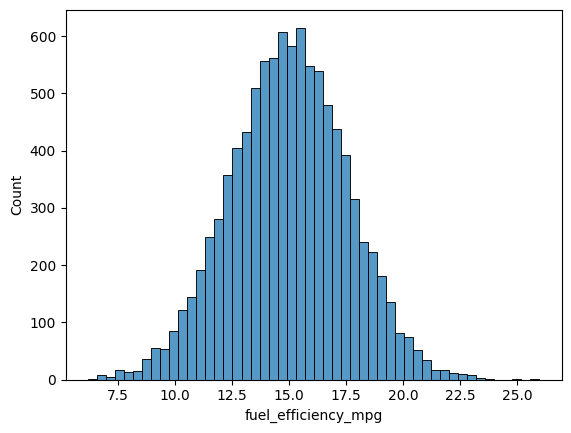

In [109]:
sns.histplot(df_small.fuel_efficiency_mpg, bins=50)

In [110]:
#Does it have a long tail?
df_small['fuel_efficiency_mpg'].skew()

np.float64(-0.012062219273507922)

In [111]:

df_small.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [112]:
#Question: Which column has missing values based on the options provided in the homework?
#answer = horsepower
#Horsepower column has missing values
df_median = df_small['horsepower'].median()
df_median

np.float64(149.0)

In [113]:
#Question: Median for horse power
#Answer: 149

In [114]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test


In [115]:
n, n_val,n_test,n_train

(9704, 1940, 1940, 5824)

In [116]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [117]:
df_train = df_small.iloc[idx[:n_train]]
df_val = df_small.iloc[idx[n_train:n_train+n_val]]
df_test = df_small.iloc[idx[n_train+n_val:]]

In [118]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
246,170,164.0,2990.040917,2019,15.963019
8125,170,NaN,2729.623741,2012,15.931964
1927,200,142.0,3126.513375,2019,14.284901
8235,200,148.0,3136.477901,2003,14.865210
424,230,141.0,3384.681613,2006,12.428822
...,...,...,...,...,...
5313,210,145.0,3054.841280,2021,14.216871
4484,210,142.0,2440.034914,2021,17.826995
7107,260,169.0,2701.627103,2002,16.028769
9043,240,137.0,2383.896460,2016,17.794204


In [119]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [120]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [121]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [122]:
df_train.iloc[10]

engine_displacement     110.000000
horsepower              161.000000
vehicle_weight         3064.002707
model_year             2002.000000
Name: 10, dtype: float64

In [123]:
#Manual Implementation of linear regresssion
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [124]:
#Root Mean Squared Error(RMSE)
def rmse(y,y_pred):
    se = (y-y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [125]:
#Regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [126]:
base = df_train.columns

In [127]:
#Fill missing values with 0
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred_0 = w0 + X_train.dot(w)

score = float(rmse(y_train, y_pred_0))
score


0.03902570026567233

In [128]:
#Fill missing values with mean
df_train_mean = float(df_train['horsepower'].mean())
df_train_mean
X_train = df_train[base].fillna(df_train_mean).values
w0, w = train_linear_regression(X_train, y_train)
y_pred_mean = w0 + X_train.dot(w)

score_mean = float(rmse(y_train, y_pred_mean))
score_mean

0.03579166325717397

In [129]:
#Question: Which option gives better RMSE?
#Answer = mean

<Axes: ylabel='Count'>

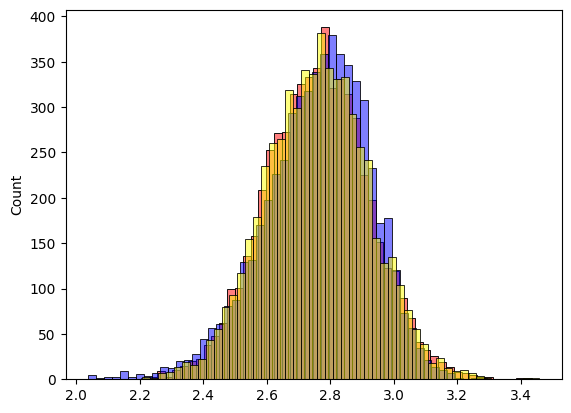

In [130]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_pred_mean, color='yellow', alpha=0.5, bins=50)

In [131]:
#tunning the model
X_train = df_train[base].fillna(0).values
X_val = df_val[base].fillna(0).values

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    
    # Train on training set
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    # print(f"r={r:<6} w0={w0:.3f}, weights={np.round(w, 3)}")

    # Predict on validation set
    y_pred = w0 + X_val.dot(w)
    
    score_tt = float(rmse(y_val, y_pred))
    print(round(score_tt,5), r)

0.03945 0
0.03952 0.01
0.04024 0.1
0.04116 1
0.04132 5
0.04135 10
0.04136 100


In [132]:
#Question: Best regularization
#Answer: 0

In [133]:
#With different seed values
n = len(df_small)

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seed_values:
    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df_small.iloc[idx]

    # Here we split, we use the copy() so we can still keep the original dataset
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = df_train[base].fillna(0).values

    X_val   = df_val[base].fillna(0).values
    
    w0, w = train_linear_regression(X_train, y_train)
    
    y_pred_val = w0 + X_val.dot(w)
    
    score = float(rmse(y_val, y_pred_val))
    scores.append(score)
    print(score, w0)

std_score = np.std(scores)
print("Std (3 d.p.):", round(std_score, 3))
# print("Standard deviation of scores:", std_score)

0.5206531296294218 27.376388746528697
0.521338891285577 29.02246855416138
0.5228069974803171 25.904357611049043
0.515951674119676 28.015450067910564
0.5109129460053851 25.93400040472635
0.52834064601107 25.89950696063403
0.5313910658146311 25.917230934138303
0.5090670387381733 28.414324731275375
0.5147399129511132 26.47841782687521
0.5131865908224594 27.513852581224892
Std (3 d.p.): 0.007


In [134]:
#Question: RMSE Standard Deviation 
#Answer: 0.006(close to 0.007)

In [135]:
n = len(df_small)
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df_small.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_full_train = pd.concat([df_train, df_val])
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

y_full_train = np.concatenate([y_train, y_val])


del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

X_full_train = df_full_train[base].fillna(0).values
X_test  = df_test[base].fillna(0).values 

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

y_pred = w0 + X_test.dot(w)

score = float(rmse(y_test, y_pred))
scores.append(score)
print(score, w0)
# print("Standard deviation of scores:", std_score)

0.5156261299169602 26.946834792836274


In [136]:
#Question: Evaluation on test
#Answer: 0.515